In [38]:
import numpy as np
import pandas as pd
import os
import pickle
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.models import Sequential,Model, load_model
from keras.layers.core import Dense, Activation
from tensorflow.keras.utils import Sequence

from keras.applications.vgg16 import VGG16
from keras.layers import Dropout, Flatten, Input
from keras.layers.convolutional import Conv2D, MaxPooling2D

from tensorflow.keras.optimizers import Adam, SGD 
from keras.optimizers import gradient_descent_v2 

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
os.getcwd()

In [4]:
path_train = "../SeekThermal/Train"
path_test = "../SeekThermal/Test"

In [ ]:
#path_train = "C:\\Users\\maria\\Jupiter_Notebooks\\Dataset_Thermal\\SeekThermal\\Train"
#path_test = "C:\\Users\\maria\\Jupiter_Notebooks\\/Dataset_Thermal\\SeekThermal\\Test"

In [ ]:
path_train

### Defining the class to load images   

In [5]:
class MasterImage0(object):

    def __init__(self,PATH='', IMAGE_SIZE = 128):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def process_image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1])        # get the label

            X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)
            
            # reshape x_Data

            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)
            print("Compiled X_data", self.X_data)
            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.process_image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('X_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('Y_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data
        print(self.X_Data)

    def load_dataset(self):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('..\SeekThermal\X_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('..\SeekThermal\Y_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from Pickle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            print("X_data", self.X_Data)
            return X_Data,Y_Data

### Train data

In [6]:
a = MasterImage0(PATH = path_train,IMAGE_SIZE = 224)
a

In [7]:
a.get_categories()

Found Categories  ['Car', 'Cat', 'Man'] 



['Car', 'Cat', 'Man']

In [8]:
(train_images, train_labels) = a.load_dataset()

Reading Dataset from Pickle Object


In [9]:
print(train_images.shape, train_labels.shape)

(4732, 224, 224, 3) (4732,)


In [10]:
train_labels

array([0, 0, 0, ..., 2, 2, 2])

In [11]:
# 3 categories - Car, Cat and Man
np.unique(train_labels)

array([0, 1, 2])

### Test data

In [12]:
class MasterImage1(object):

    def __init__(self,PATH='', IMAGE_SIZE = 300):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def process_image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1])        # get the label

            X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)

            # reshape x_Data

            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.process_image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('X1_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('Y1_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('..\SeekThermal\X1_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('..\SeekThermal\Y1_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from Pickle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data

In [13]:
b = MasterImage1(PATH = path_test, IMAGE_SIZE = 224)
b

In [14]:
(test_images, test_labels) = b.load_dataset()

Reading Dataset from Pickle Object


In [15]:
test_images.shape

(1067, 224, 224, 3)

In [16]:
test_labels

array([0, 0, 0, ..., 2, 2, 2])

In [17]:
# 3 label categories

np.unique(test_labels)

array([0, 1, 2])

### Defining the Man images category as '1' vs  Car and Cat as '0'

In [18]:
### Defining Man as 1 vs the other categories
test_labels_binary0 = np.where(test_labels==1, 0, test_labels) 
test_labels_binary0

array([0, 0, 0, ..., 2, 2, 2])

In [19]:
test_labels_binary = np.where(test_labels==2, 1, test_labels_binary0)

np.unique(test_labels_binary)

array([0, 1])

In [20]:
### Man
train_labels_binary0 = np.where(train_labels==1, 0, train_labels) 
train_labels_binary0

array([0, 0, 0, ..., 2, 2, 2])

In [21]:
train_labels_binary = np.where(train_labels==2, 1, train_labels_binary0)

train_labels_binary 

array([0, 0, 0, ..., 1, 1, 1])

### Defining Train and Test images

In [22]:
test_labels_binary = test_labels_binary.reshape(test_labels_binary.shape[0],1)
train_labels_binary = train_labels_binary.reshape(train_labels_binary.shape[0],1)

In [23]:
# Dataset shapes
print('Train: X_images=%s, y_labels=%s' % (train_images.shape, train_labels_binary.shape))
print('Test: X_images=%s, y_labels=%s' % (test_images.shape, test_labels_binary.shape))

Train: X_images=(4732, 224, 224, 3), y_labels=(4732, 1)
Test: X_images=(1067, 224, 224, 3), y_labels=(1067, 1)


In [24]:
# Setting 17% of the training set as a validation set

#validation set
X_val_images = train_images[-800:]
y_val_labels = train_labels_binary[-800:]

#training set
X_train_images = train_images[:-800]
y_train_labels = train_labels_binary[:-800]

In [25]:
print('Train: X_train_images=%s, y_train_labels=%s' % (X_train_images.shape, y_train_labels.shape))
print('Validation: X_val_images=%s, y_val_labels=%s' % (X_val_images.shape, y_val_labels.shape))


Train: X_train_images=(3932, 224, 224, 3), y_train_labels=(3932, 1)
Validation: X_val_images=(800, 224, 224, 3), y_val_labels=(800, 1)


### CNN Model

In [32]:
input_shape = X_train_images.shape[1:]
input_shape

(224, 224, 3)

In [33]:
alexnet_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=input_shape),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Define the model  - no regularisation - basic
cnn_model = tf.keras.Sequential([
    Conv2D(32, (5,5), padding = 'same', activation = 'relu', input_shape =(input_shape)),
#    Conv2D(64, (5,5), padding = 'same', activation = 'relu', input_shape =(input_shape)),
#    MaxPooling2D(2,2),
#    Dropout(0.1),
    Conv2D(128, (3,3), padding = 'same', activation = 'relu', input_shape =(input_shape)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(1, activation = "sigmoid"),                       

])

cnn_model.summary()

In [34]:
# Compile the model
alexnet_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [36]:
# Fit the model
#alexnet_trained_model = alexnet_model.fit( X_train_images, y_train_labels, validation_data=(X_val_images, y_val_labels),verbose=2, epochs=100)


In [39]:
# Define batches manually so it does not run out of memory. Batch = 16. 

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

train_gen = DataGenerator(X_train_images, y_train_labels, 16)
test_gen = DataGenerator(X_val_images, y_val_labels, 16)


alexnet_trained_model = alexnet_model.fit(train_gen, epochs=100,validation_data=test_gen)

Epoch 1/100
246/246 [==============================] - 24s 53ms/step - loss: 8.2112 - accuracy: 0.6879 - val_loss: 1.6235 - val_accuracy: 0.1088
Epoch 2/100
246/246 [==============================] - 6s 26ms/step - loss: 0.5190 - accuracy: 0.7683 - val_loss: 5.3164 - val_accuracy: 0.1075
Epoch 3/100
246/246 [==============================] - 6s 25ms/step - loss: 0.5009 - accuracy: 0.8108 - val_loss: 2.6108 - val_accuracy: 0.3187
Epoch 4/100
246/246 [==============================] - 6s 25ms/step - loss: 0.5063 - accuracy: 0.7996 - val_loss: 1.0268 - val_accuracy: 0.6637
Epoch 5/100
246/246 [==============================] - 6s 25ms/step - loss: 0.6791 - accuracy: 0.8161 - val_loss: 17.5485 - val_accuracy: 0.0037
Epoch 6/100
246/246 [==============================] - 6s 25ms/step - loss: 0.4135 - accuracy: 0.8616 - val_loss: 6.7448 - val_accuracy: 0.0775
Epoch 7/100
246/246 [==============================] - 6s 25ms/step - loss: 0.3210 - accuracy: 0.8942 - val_loss: 12.8809 - val_accura

In [45]:
scores = alexnet_model.evaluate(test_images, test_labels_binary, verbose=0)
print("Alexnet Accuracy on Test Set: %.2f%%" % (scores[1]*100))

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

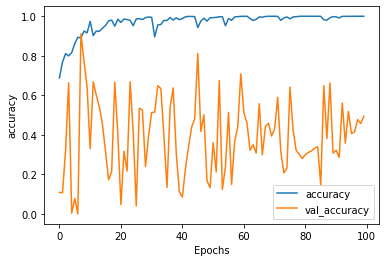

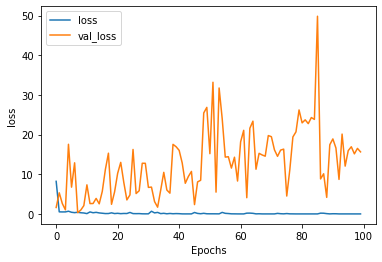

In [41]:
def plot_graphs(alexnet_trained_model, string):
    plt.plot(alexnet_trained_model.history[string])
    plt.plot(alexnet_trained_model.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
    
  #Plot the accuracy and loss
plot_graphs(alexnet_trained_model, "accuracy")
plot_graphs(alexnet_trained_model, "loss")

In [42]:
_, val_acc = alexnet_model.evaluate(X_val_images, y_val_labels, verbose=0)
_, test_acc = alexnet_model.evaluate(test_images, test_labels_binary, verbose=0)
print('Validation: %.3f, Test: %.3f' % (val_acc, test_acc))

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

### Saving the model monitoring accuracy and loss

In [ ]:
# Save the best model with early stopping and checkpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('../SeekThermal/alexnet_best_model.h5', monitor='val_accuracy', mode='max', verbose=0, patience=10, save_best_only=True)
# fit model
history = alexnet_model.fit(X_train_images, y_train_labels,  validation_data=(X_val_images, y_val_labels), verbose=0, epochs=120, callbacks=[es, mc])
# load the saved model
saved_model = load_model('../SeekThermal/alexnet_best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train_images, y_train_labels, verbose=0)
_, test_acc = saved_model.evaluate(test_images, test_labels_binary, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))